In [28]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path
import os
os.environ['USE_PYGEOS'] = '0'
import geopandas as gpd
import seaborn as sns
import pandas as pd
from tqdm import tqdm
from shapely import wkt
import gc
import pickle
import cartopy.crs as ccrs

### Fire Distribution Per Year

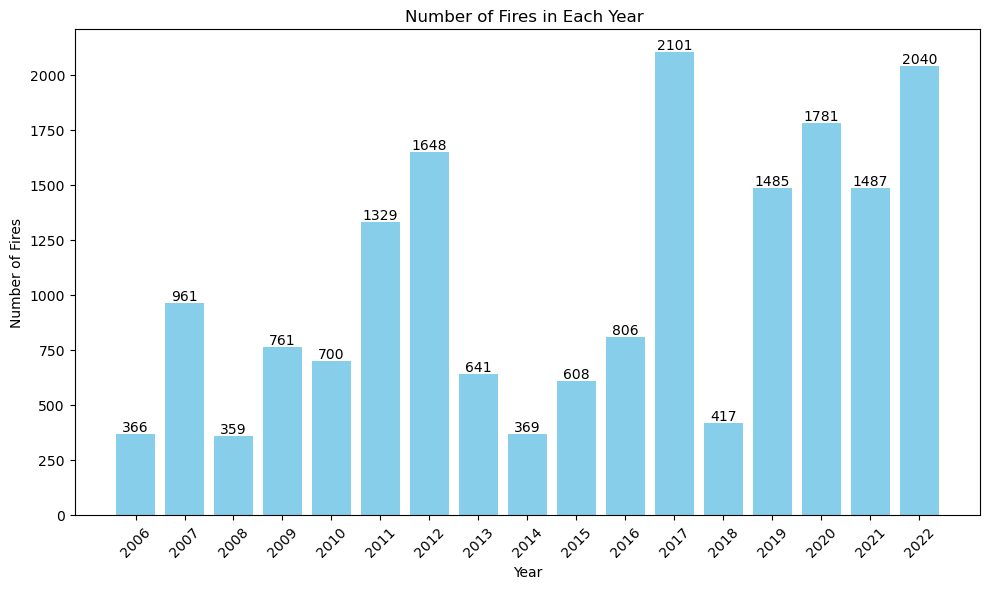

In [29]:


# Path to the directory containing the subfolders
directory = "/home/udas/Desktop/UD_Data_Copy/b.final_burned_area"

# Dictionary to store year and number of files
year_file_count = {}

# Iterate over each subfolder in the directory
for folder in os.listdir(directory):
    folder_path = os.path.join(directory, folder)
    
    # Check if it's a directory
    if os.path.isdir(folder_path):
        # Count the number of files in the folder
        num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
        year_file_count[folder] = num_files

# Sort the dictionary by year (folder name)
year_file_count = dict(sorted(year_file_count.items()))

# Plotting
plt.figure(figsize=(10, 6))
bars=plt.bar(year_file_count.keys(), year_file_count.values(), color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Fires')
plt.title('Number of Fires in Each Year ')
plt.xticks(rotation=45)

#Adding the number labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')


plt.tight_layout()
plt.show()


### Distribution of Burned Area Sizes

In [32]:
def get_burned_area_size(root,area_file):
    
    area_list=[]

    with open(area_file,'ab') as f:
        for year in tqdm(os.listdir(root)):
            year_path=os.path.join(root,year)
            print(year_path)

            if os.path.isdir(year_path):
                for file in tqdm(os.listdir(year_path),leave=False):
                    if file.endswith(".nc"):
        
                        file_path = os.path.join(year_path,file)
                        # print(file_path)
                        dataset=xr.open_dataset(file_path)
                        ignition_point=dataset['ignition_points'].isel(time=-1).values
                        # print(ignition_point.shape)
                        fire_indices=np.argwhere(ignition_point>0)
                        print(f' fire indices shape {fire_indices.shape}')
                        if fire_indices.shape[0]>1:
                            area=0
                            for idx in fire_indices:
                                # print(f'Inside multiple ignitions')
                                row,col=idx
                                # print(f'area is {area}')
                                # print(f'ind area is {ignition_point[row,col]}')
                                # print(f'sum is {area+ignition_point[row,col]}')
                                area+=ignition_point[row,col]
                                # print(f'new area is {area}')
                            area_list.append(area)
                        else:
                            # print(f'Inside single ignition')
                            print(fire_indices)
                            row,col=fire_indices[0]
                            print(row,col)
                            area=ignition_point[row,col]
                            # print(f'area is {area}')
                            area_list.append(area)
                        pickle.dump(area_list,f)
                        dataset.close()

    return np.array(area_list)

def pickle_load_area(filepath):
    with open(filepath, 'rb') as f:
        area_list = []
        while True:
            try:
                # Load each appended area_list segment
                area_list.extend(pickle.load(f))
            except EOFError:
                break
    return np.array(area_list)

def plot_area_size(area_list):
    plt.figure(figsize=(10, 6))
    plt.hist(area_list, bins=100, color='lightcoral', edgecolor='black')
    plt.xlabel('Burned Area (in hectares)')
    plt.ylabel('Frequency')
    plt.title('Distribution of Burned Areas from Ignition Points')
    plt.grid(True)
    plt.tight_layout()
    plt.show()



In [33]:
area_file='./areas_test.pkl'
area_list=get_burned_area_size(directory,area_file)
# area_list=pickle_load_area(area_file)

# plot_area_size(area_list)

  0%|          | 0/18 [00:00<?, ?it/s]

/home/udas/Desktop/UD_Data_Copy/b.final_burned_area/2020


 fire indices shape (6, 2)
Inside multiple ignitions
area is 0
ind area is 76.0
sum is 76.0
new area is 76.0
Inside multiple ignitions
area is 76.0
ind area is 132.0
sum is 208.0
new area is 208.0
Inside multiple ignitions
area is 208.0
ind area is 191.0
sum is 399.0
new area is 399.0
Inside multiple ignitions
area is 399.0
ind area is 38.0
sum is 437.0
new area is 437.0
Inside multiple ignitions
area is 437.0
ind area is 123.0
sum is 560.0
new area is 560.0
Inside multiple ignitions
area is 560.0
ind area is 911.0
sum is 1471.0
new area is 1471.0
 fire indices shape (1, 2)
Inside single ignition
[[32 32]]
32 32
area is 50.0
 fire indices shape (1, 2)
Inside single ignition
[[31 31]]
31 31
area is 144.0
 fire indices shape (3, 2)
Inside multiple ignitions
area is 0
ind area is 262.0
sum is 262.0
new area is 262.0
Inside multiple ignitions
area is 262.0
ind area is 15.0
sum is 277.0
new area is 277.0
Inside multiple ignitions
area is 277.0
ind area is 181.0
sum is 458.0
new area is 458.

 fire indices shape (5, 2)
Inside multiple ignitions
area is 0
ind area is 26.0
sum is 26.0
new area is 26.0
Inside multiple ignitions
area is 26.0
ind area is 78.0
sum is 104.0
new area is 104.0
Inside multiple ignitions
area is 104.0
ind area is 91.0
sum is 195.0
new area is 195.0
Inside multiple ignitions
area is 195.0
ind area is 45.0
sum is 240.0
new area is 240.0
Inside multiple ignitions
area is 240.0
ind area is 94.0
sum is 334.0
new area is 334.0
 fire indices shape (1, 2)
Inside single ignition
[[32 32]]
32 32
area is 72.0
 fire indices shape (1, 2)
Inside single ignition
[[32 32]]
32 32
area is 133.0


 fire indices shape (3, 2)
Inside multiple ignitions
area is 0
ind area is 96.0
sum is 96.0
new area is 96.0
Inside multiple ignitions
area is 96.0
ind area is 78.0
sum is 174.0
new area is 174.0
Inside multiple ignitions
area is 174.0
ind area is 122.0
sum is 296.0
new area is 296.0
 fire indices shape (2, 2)
Inside multiple ignitions
area is 0
ind area is 205.0
sum is 205.0
new area is 205.0
Inside multiple ignitions
area is 205.0
ind area is 10.0
sum is 215.0
new area is 215.0
 fire indices shape (2, 2)
Inside multiple ignitions
area is 0
ind area is 24.0
sum is 24.0
new area is 24.0
Inside multiple ignitions
area is 24.0
ind area is 115.0
sum is 139.0
new area is 139.0
 fire indices shape (2, 2)
Inside multiple ignitions
area is 0
ind area is 412.0
sum is 412.0
new area is 412.0
Inside multiple ignitions
area is 412.0
ind area is 482.0
sum is 894.0
new area is 894.0
 fire indices shape (5, 2)
Inside multiple ignitions
area is 0
ind area is 44.0
sum is 44.0
new area is 44.0
Inside m

 fire indices shape (8, 2)
Inside multiple ignitions
area is 0
ind area is 338.0
sum is 338.0
new area is 338.0
Inside multiple ignitions
area is 338.0
ind area is 780.0
sum is 1118.0
new area is 1118.0
Inside multiple ignitions
area is 1118.0
ind area is 419.0
sum is 1537.0
new area is 1537.0
Inside multiple ignitions
area is 1537.0
ind area is 1139.0
sum is 2676.0
new area is 2676.0
Inside multiple ignitions
area is 2676.0
ind area is 278.0
sum is 2954.0
new area is 2954.0
Inside multiple ignitions
area is 2954.0
ind area is 382.0
sum is 3336.0
new area is 3336.0
Inside multiple ignitions
area is 3336.0
ind area is 1407.0
sum is 4743.0
new area is 4743.0
Inside multiple ignitions
area is 4743.0
ind area is 740.0
sum is 5483.0
new area is 5483.0
 fire indices shape (11, 2)
Inside multiple ignitions
area is 0
ind area is 83.0
sum is 83.0
new area is 83.0
Inside multiple ignitions
area is 83.0
ind area is 24.0
sum is 107.0
new area is 107.0
Inside multiple ignitions
area is 107.0
ind ar

 fire indices shape (1, 2)
Inside single ignition
[[32 31]]
32 31
area is 258.0
 fire indices shape (1, 2)
Inside single ignition
[[32 31]]
32 31
area is 184.0
 fire indices shape (1, 2)
Inside single ignition
[[31 31]]
31 31
area is 34.0
 fire indices shape (3, 2)
Inside multiple ignitions
area is 0
ind area is 49.0
sum is 49.0
new area is 49.0
Inside multiple ignitions
area is 49.0
ind area is 231.0
sum is 280.0
new area is 280.0
Inside multiple ignitions
area is 280.0
ind area is 56.0
sum is 336.0
new area is 336.0
 fire indices shape (2, 2)
Inside multiple ignitions
area is 0
ind area is 204.0
sum is 204.0
new area is 204.0
Inside multiple ignitions
area is 204.0
ind area is 125.0
sum is 329.0
new area is 329.0
 fire indices shape (3, 2)
Inside multiple ignitions
area is 0
ind area is 43.0
sum is 43.0
new area is 43.0
Inside multiple ignitions
area is 43.0
ind area is 23.0
sum is 66.0
new area is 66.0
Inside multiple ignitions
area is 66.0
ind area is 298.0
sum is 364.0
new area is

 fire indices shape (2, 2)
Inside multiple ignitions
area is 0
ind area is 1345.0
sum is 1345.0
new area is 1345.0
Inside multiple ignitions
area is 1345.0
ind area is 4959.0
sum is 6304.0
new area is 6304.0
 fire indices shape (1, 2)
Inside single ignition
[[32 32]]
32 32
area is 44.0
 fire indices shape (4, 2)
Inside multiple ignitions
area is 0
ind area is 5.0
sum is 5.0
new area is 5.0
Inside multiple ignitions
area is 5.0
ind area is 12.0
sum is 17.0
new area is 17.0
Inside multiple ignitions
area is 17.0
ind area is 260.0
sum is 277.0
new area is 277.0
Inside multiple ignitions
area is 277.0
ind area is 309.0
sum is 586.0
new area is 586.0


 fire indices shape (2, 2)
Inside multiple ignitions
area is 0
ind area is 68.0
sum is 68.0
new area is 68.0
Inside multiple ignitions
area is 68.0
ind area is 64.0
sum is 132.0
new area is 132.0
 fire indices shape (1, 2)
Inside single ignition
[[32 31]]
32 31
area is 121.0
 fire indices shape (5, 2)
Inside multiple ignitions
area is 0
ind area is 1896.0
sum is 1896.0
new area is 1896.0
Inside multiple ignitions
area is 1896.0
ind area is 89.0
sum is 1985.0
new area is 1985.0
Inside multiple ignitions
area is 1985.0
ind area is 556.0
sum is 2541.0
new area is 2541.0
Inside multiple ignitions
area is 2541.0
ind area is 190.0
sum is 2731.0
new area is 2731.0
Inside multiple ignitions
area is 2731.0
ind area is 997.0
sum is 3728.0
new area is 3728.0
 fire indices shape (1, 2)
Inside single ignition
[[31 31]]
31 31
area is 61.0
 fire indices shape (7, 2)
Inside multiple ignitions
area is 0
ind area is 1442.0
sum is 1442.0
new area is 1442.0
Inside multiple ignitions
area is 1442.0
ind are

 fire indices shape (1, 2)
Inside single ignition
[[32 31]]
32 31
area is 154.0
 fire indices shape (1, 2)
Inside single ignition
[[32 31]]
32 31
area is 42.0
 fire indices shape (3, 2)
Inside multiple ignitions
area is 0
ind area is 34.0
sum is 34.0
new area is 34.0
Inside multiple ignitions
area is 34.0
ind area is 253.0
sum is 287.0
new area is 287.0
Inside multiple ignitions
area is 287.0
ind area is 79.0
sum is 366.0
new area is 366.0
 fire indices shape (1, 2)
Inside single ignition
[[31 31]]
31 31
area is 39.0
 fire indices shape (2, 2)
Inside multiple ignitions
area is 0
ind area is 33.0
sum is 33.0
new area is 33.0
Inside multiple ignitions
area is 33.0
ind area is 160.0
sum is 193.0
new area is 193.0
 fire indices shape (1, 2)
Inside single ignition
[[32 32]]
32 32
area is 783.0
 fire indices shape (3, 2)
Inside multiple ignitions
area is 0
ind area is 96.0
sum is 96.0
new area is 96.0
Inside multiple ignitions
area is 96.0
ind area is 43.0
sum is 139.0
new area is 139.0
Insi

 fire indices shape (1, 2)
Inside single ignition
[[32 32]]
32 32
area is 54.0
 fire indices shape (1, 2)
Inside single ignition
[[32 32]]
32 32
area is 36.0
 fire indices shape (1, 2)
Inside single ignition
[[31 32]]
31 32
area is 58.0
 fire indices shape (1, 2)
Inside single ignition
[[31 31]]
31 31
area is 504.0
 fire indices shape (1, 2)
Inside single ignition
[[31 31]]
31 31
area is 1730.0
 fire indices shape (1, 2)
Inside single ignition
[[31 31]]
31 31
area is 91.0
 fire indices shape (1, 2)
Inside single ignition
[[32 31]]
32 31
area is 30.0
 fire indices shape (1, 2)
Inside single ignition
[[31 31]]
31 31
area is 53.0
 fire indices shape (2, 2)
Inside multiple ignitions
area is 0
ind area is 48.0
sum is 48.0
new area is 48.0
Inside multiple ignitions
area is 48.0
ind area is 101.0
sum is 149.0
new area is 149.0
 fire indices shape (9, 2)
Inside multiple ignitions
area is 0
ind area is 410.0
sum is 410.0
new area is 410.0
Inside multiple ignitions
area is 410.0
ind area is 25.0

 fire indices shape (2, 2)
Inside multiple ignitions
area is 0
ind area is 98.0
sum is 98.0
new area is 98.0
Inside multiple ignitions
area is 98.0
ind area is 224.0
sum is 322.0
new area is 322.0
 fire indices shape (3, 2)
Inside multiple ignitions
area is 0
ind area is 47.0
sum is 47.0
new area is 47.0
Inside multiple ignitions
area is 47.0
ind area is 216.0
sum is 263.0
new area is 263.0
Inside multiple ignitions
area is 263.0
ind area is 328.0
sum is 591.0
new area is 591.0
 fire indices shape (1, 2)
Inside single ignition
[[32 31]]
32 31
area is 48.0
 fire indices shape (2, 2)
Inside multiple ignitions
area is 0
ind area is 26.0
sum is 26.0
new area is 26.0
Inside multiple ignitions
area is 26.0
ind area is 70.0
sum is 96.0
new area is 96.0
 fire indices shape (3, 2)
Inside multiple ignitions
area is 0
ind area is 55.0
sum is 55.0
new area is 55.0
Inside multiple ignitions
area is 55.0
ind area is 353.0
sum is 408.0
new area is 408.0
Inside multiple ignitions
area is 408.0
ind are

 fire indices shape (3, 2)
Inside multiple ignitions
area is 0
ind area is 728.0
sum is 728.0
new area is 728.0
Inside multiple ignitions
area is 728.0
ind area is 101.0
sum is 829.0
new area is 829.0
Inside multiple ignitions
area is 829.0
ind area is 148.0
sum is 977.0
new area is 977.0
 fire indices shape (3, 2)
Inside multiple ignitions
area is 0
ind area is 33.0
sum is 33.0
new area is 33.0
Inside multiple ignitions
area is 33.0
ind area is 36.0
sum is 69.0
new area is 69.0
Inside multiple ignitions
area is 69.0
ind area is 49.0
sum is 118.0
new area is 118.0
 fire indices shape (1, 2)
Inside single ignition
[[31 32]]
31 32
area is 326.0
 fire indices shape (1, 2)
Inside single ignition
[[32 32]]
32 32
area is 37.0
 fire indices shape (1, 2)
Inside single ignition
[[32 32]]
32 32
area is 137.0
 fire indices shape (1, 2)
Inside single ignition
[[32 32]]
32 32
area is 42.0
 fire indices shape (1, 2)
Inside single ignition
[[31 32]]
31 32
area is 37.0
 fire indices shape (2, 2)
Insid

 fire indices shape (2, 2)
Inside multiple ignitions
area is 0
ind area is 199.0
sum is 199.0
new area is 199.0
Inside multiple ignitions
area is 199.0
ind area is 174.0
sum is 373.0
new area is 373.0
 fire indices shape (1, 2)
Inside single ignition
[[31 32]]
31 32
area is 669.0
 fire indices shape (1, 2)
Inside single ignition
[[31 32]]
31 32
area is 58.0
 fire indices shape (2, 2)
Inside multiple ignitions
area is 0
ind area is 46.0
sum is 46.0
new area is 46.0
Inside multiple ignitions
area is 46.0
ind area is 489.0
sum is 535.0
new area is 535.0
 fire indices shape (3, 2)
Inside multiple ignitions
area is 0
ind area is 827.0
sum is 827.0
new area is 827.0
Inside multiple ignitions
area is 827.0
ind area is 1290.0
sum is 2117.0
new area is 2117.0
Inside multiple ignitions
area is 2117.0
ind area is 1293.0
sum is 3410.0
new area is 3410.0
 fire indices shape (1, 2)
Inside single ignition
[[31 32]]
31 32
area is 73.0
 fire indices shape (1, 2)
Inside single ignition
[[31 32]]
31 32
a

 fire indices shape (1, 2)
Inside single ignition
[[31 31]]
31 31
area is 117.0
 fire indices shape (1, 2)
Inside single ignition
[[32 32]]
32 32
area is 16758.0
 fire indices shape (1, 2)
Inside single ignition
[[31 31]]
31 31
area is 249.0
 fire indices shape (1, 2)
Inside single ignition
[[31 32]]
31 32
area is 420.0
 fire indices shape (1, 2)
Inside single ignition
[[31 32]]
31 32
area is 51.0
 fire indices shape (2, 2)
Inside multiple ignitions
area is 0
ind area is 253.0
sum is 253.0
new area is 253.0
Inside multiple ignitions
area is 253.0
ind area is 134.0
sum is 387.0
new area is 387.0
 fire indices shape (3, 2)
Inside multiple ignitions
area is 0
ind area is 250.0
sum is 250.0
new area is 250.0
Inside multiple ignitions
area is 250.0
ind area is 91.0
sum is 341.0
new area is 341.0
Inside multiple ignitions
area is 341.0
ind area is 201.0
sum is 542.0
new area is 542.0
 fire indices shape (1, 2)
Inside single ignition
[[31 32]]
31 32
area is 128.0
 fire indices shape (1, 2)
In

 fire indices shape (2, 2)
Inside multiple ignitions
area is 0
ind area is 32.0
sum is 32.0
new area is 32.0
Inside multiple ignitions
area is 32.0
ind area is 99.0
sum is 131.0
new area is 131.0
 fire indices shape (6, 2)
Inside multiple ignitions
area is 0
ind area is 26.0
sum is 26.0
new area is 26.0
Inside multiple ignitions
area is 26.0
ind area is 78.0
sum is 104.0
new area is 104.0
Inside multiple ignitions
area is 104.0
ind area is 107.0
sum is 211.0
new area is 211.0
Inside multiple ignitions
area is 211.0
ind area is 91.0
sum is 302.0
new area is 302.0
Inside multiple ignitions
area is 302.0
ind area is 45.0
sum is 347.0
new area is 347.0
Inside multiple ignitions
area is 347.0
ind area is 94.0
sum is 441.0
new area is 441.0
 fire indices shape (2, 2)
Inside multiple ignitions
area is 0
ind area is 79.0
sum is 79.0
new area is 79.0
Inside multiple ignitions
area is 79.0
ind area is 59.0
sum is 138.0
new area is 138.0
 fire indices shape (1, 2)
Inside single ignition
[[32 32]]

 fire indices shape (1, 2)
Inside single ignition
[[32 31]]
32 31
area is 340.0
 fire indices shape (2, 2)
Inside multiple ignitions
area is 0
ind area is 187.0
sum is 187.0
new area is 187.0
Inside multiple ignitions
area is 187.0
ind area is 800.0
sum is 987.0
new area is 987.0
 fire indices shape (1, 2)
Inside single ignition
[[32 32]]
32 32
area is 87.0
 fire indices shape (3, 2)
Inside multiple ignitions
area is 0
ind area is 732.0
sum is 732.0
new area is 732.0
Inside multiple ignitions
area is 732.0
ind area is 216.0
sum is 948.0
new area is 948.0
Inside multiple ignitions
area is 948.0
ind area is 864.0
sum is 1812.0
new area is 1812.0
 fire indices shape (1, 2)
Inside single ignition
[[32 31]]
32 31
area is 125.0
 fire indices shape (1, 2)
Inside single ignition
[[31 31]]
31 31
area is 128.0
 fire indices shape (1, 2)
Inside single ignition
[[31 31]]
31 31
area is 552.0
 fire indices shape (3, 2)
Inside multiple ignitions
area is 0
ind area is 28.0
sum is 28.0
new area is 28.0

 fire indices shape (3, 2)
Inside multiple ignitions
area is 0
ind area is 42.0
sum is 42.0
new area is 42.0
Inside multiple ignitions
area is 42.0
ind area is 49.0
sum is 91.0
new area is 91.0
Inside multiple ignitions
area is 91.0
ind area is 44.0
sum is 135.0
new area is 135.0
 fire indices shape (7, 2)
Inside multiple ignitions
area is 0
ind area is 187.0
sum is 187.0
new area is 187.0
Inside multiple ignitions
area is 187.0
ind area is 28.0
sum is 215.0
new area is 215.0
Inside multiple ignitions
area is 215.0
ind area is 92.0
sum is 307.0
new area is 307.0
Inside multiple ignitions
area is 307.0
ind area is 38.0
sum is 345.0
new area is 345.0
Inside multiple ignitions
area is 345.0
ind area is 140.0
sum is 485.0
new area is 485.0
Inside multiple ignitions
area is 485.0
ind area is 16.0
sum is 501.0
new area is 501.0
Inside multiple ignitions
area is 501.0
ind area is 259.0
sum is 760.0
new area is 760.0
 fire indices shape (2, 2)
Inside multiple ignitions
area is 0
ind area is 19

 fire indices shape (1, 2)
Inside single ignition
[[31 32]]
31 32
area is 2981.0
 fire indices shape (1, 2)
Inside single ignition
[[31 31]]
31 31
area is 50.0
 fire indices shape (1, 2)
Inside single ignition
[[31 31]]
31 31
area is 52.0
 fire indices shape (5, 2)
Inside multiple ignitions
area is 0
ind area is 48.0
sum is 48.0
new area is 48.0
Inside multiple ignitions
area is 48.0
ind area is 158.0
sum is 206.0
new area is 206.0
Inside multiple ignitions
area is 206.0
ind area is 215.0
sum is 421.0
new area is 421.0
Inside multiple ignitions
area is 421.0
ind area is 140.0
sum is 561.0
new area is 561.0
Inside multiple ignitions
area is 561.0
ind area is 42.0
sum is 603.0
new area is 603.0
 fire indices shape (3, 2)
Inside multiple ignitions
area is 0
ind area is 174.0
sum is 174.0
new area is 174.0
Inside multiple ignitions
area is 174.0
ind area is 101.0
sum is 275.0
new area is 275.0
Inside multiple ignitions
area is 275.0
ind area is 528.0
sum is 803.0
new area is 803.0
 fire in

 fire indices shape (2, 2)
Inside multiple ignitions
area is 0
ind area is 146.0
sum is 146.0
new area is 146.0
Inside multiple ignitions
area is 146.0
ind area is 249.0
sum is 395.0
new area is 395.0
 fire indices shape (3, 2)
Inside multiple ignitions
area is 0
ind area is 153.0
sum is 153.0
new area is 153.0
Inside multiple ignitions
area is 153.0
ind area is 100.0
sum is 253.0
new area is 253.0
Inside multiple ignitions
area is 253.0
ind area is 125.0
sum is 378.0
new area is 378.0
 fire indices shape (1, 2)
Inside single ignition
[[32 32]]
32 32
area is 51.0
 fire indices shape (2, 2)
Inside multiple ignitions
area is 0
ind area is 38.0
sum is 38.0
new area is 38.0
Inside multiple ignitions
area is 38.0
ind area is 111.0
sum is 149.0
new area is 149.0
 fire indices shape (1, 2)
Inside single ignition
[[32 32]]
32 32
area is 413.0
 fire indices shape (1, 2)
Inside single ignition
[[32 31]]
32 31
area is 40.0
 fire indices shape (1, 2)
Inside single ignition
[[32 32]]
32 32
area is 

 fire indices shape (1, 2)
Inside single ignition
[[31 31]]
31 31
area is 40.0
 fire indices shape (2, 2)
Inside multiple ignitions
area is 0
ind area is 49.0
sum is 49.0
new area is 49.0
Inside multiple ignitions
area is 49.0
ind area is 38.0
sum is 87.0
new area is 87.0
 fire indices shape (1, 2)
Inside single ignition
[[31 32]]
31 32
area is 68.0
 fire indices shape (1, 2)
Inside single ignition
[[32 31]]
32 31
area is 429.0
 fire indices shape (4, 2)
Inside multiple ignitions
area is 0
ind area is 31.0
sum is 31.0
new area is 31.0
Inside multiple ignitions
area is 31.0
ind area is 39.0
sum is 70.0
new area is 70.0
Inside multiple ignitions
area is 70.0
ind area is 11.0
sum is 81.0
new area is 81.0
Inside multiple ignitions
area is 81.0
ind area is 93.0
sum is 174.0
new area is 174.0
 fire indices shape (1, 2)
Inside single ignition
[[31 31]]
31 31
area is 1845.0
 fire indices shape (1, 2)
Inside single ignition
[[32 32]]
32 32
area is 280.0
 fire indices shape (1, 2)
Inside single 

 fire indices shape (2, 2)
Inside multiple ignitions
area is 0
ind area is 70.0
sum is 70.0
new area is 70.0
Inside multiple ignitions
area is 70.0
ind area is 32.0
sum is 102.0
new area is 102.0
 fire indices shape (2, 2)
Inside multiple ignitions
area is 0
ind area is 688.0
sum is 688.0
new area is 688.0
Inside multiple ignitions
area is 688.0
ind area is 43.0
sum is 731.0
new area is 731.0
 fire indices shape (2, 2)
Inside multiple ignitions
area is 0
ind area is 65.0
sum is 65.0
new area is 65.0
Inside multiple ignitions
area is 65.0
ind area is 145.0
sum is 210.0
new area is 210.0
 fire indices shape (1, 2)
Inside single ignition
[[32 32]]
32 32
area is 62.0
 fire indices shape (1, 2)
Inside single ignition
[[31 32]]
31 32
area is 143.0
 fire indices shape (1, 2)
Inside single ignition
[[32 32]]
32 32
area is 394.0
 fire indices shape (7, 2)
Inside multiple ignitions
area is 0
ind area is 282.0
sum is 282.0
new area is 282.0
Inside multiple ignitions
area is 282.0
ind area is 37.0

 fire indices shape (1, 2)
Inside single ignition
[[32 31]]
32 31
area is 860.0
 fire indices shape (1, 2)
Inside single ignition
[[32 32]]
32 32
area is 42.0
 fire indices shape (1, 2)
Inside single ignition
[[32 31]]
32 31
area is 83.0
 fire indices shape (1, 2)
Inside single ignition
[[32 31]]
32 31
area is 33.0
 fire indices shape (2, 2)
Inside multiple ignitions
area is 0
ind area is 307.0
sum is 307.0
new area is 307.0
Inside multiple ignitions
area is 307.0
ind area is 231.0
sum is 538.0
new area is 538.0
 fire indices shape (1, 2)
Inside single ignition
[[32 31]]
32 31
area is 164.0
 fire indices shape (3, 2)
Inside multiple ignitions
area is 0
ind area is 197.0
sum is 197.0
new area is 197.0
Inside multiple ignitions
area is 197.0
ind area is 418.0
sum is 615.0
new area is 615.0
Inside multiple ignitions
area is 615.0
ind area is 338.0
sum is 953.0
new area is 953.0
 fire indices shape (3, 2)
Inside multiple ignitions
area is 0
ind area is 301.0
sum is 301.0
new area is 301.0


 fire indices shape (1, 2)
Inside single ignition
[[32 31]]
32 31
area is 490.0
 fire indices shape (5, 2)
Inside multiple ignitions
area is 0
ind area is 273.0
sum is 273.0
new area is 273.0
Inside multiple ignitions
area is 273.0
ind area is 161.0
sum is 434.0
new area is 434.0
Inside multiple ignitions
area is 434.0
ind area is 32.0
sum is 466.0
new area is 466.0
Inside multiple ignitions
area is 466.0
ind area is 45.0
sum is 511.0
new area is 511.0
Inside multiple ignitions
area is 511.0
ind area is 58.0
sum is 569.0
new area is 569.0
 fire indices shape (2, 2)
Inside multiple ignitions
area is 0
ind area is 163.0
sum is 163.0
new area is 163.0
Inside multiple ignitions
area is 163.0
ind area is 15.0
sum is 178.0
new area is 178.0
 fire indices shape (8, 2)
Inside multiple ignitions
area is 0
ind area is 2222.0
sum is 2222.0
new area is 2222.0
Inside multiple ignitions
area is 2222.0
ind area is 7306.0
sum is 9528.0
new area is 9528.0
Inside multiple ignitions
area is 9528.0
ind ar

 fire indices shape (5, 2)
Inside multiple ignitions
area is 0
ind area is 44.0
sum is 44.0
new area is 44.0
Inside multiple ignitions
area is 44.0
ind area is 37.0
sum is 81.0
new area is 81.0
Inside multiple ignitions
area is 81.0
ind area is 290.0
sum is 371.0
new area is 371.0
Inside multiple ignitions
area is 371.0
ind area is 228.0
sum is 599.0
new area is 599.0
Inside multiple ignitions
area is 599.0
ind area is 30.0
sum is 629.0
new area is 629.0
 fire indices shape (1, 2)
Inside single ignition
[[31 31]]
31 31
area is 1114.0
 fire indices shape (1, 2)
Inside single ignition
[[32 31]]
32 31
area is 56.0
 fire indices shape (1, 2)
Inside single ignition
[[32 31]]
32 31
area is 107.0
 fire indices shape (2, 2)
Inside multiple ignitions
area is 0
ind area is 109.0
sum is 109.0
new area is 109.0
Inside multiple ignitions
area is 109.0
ind area is 61.0
sum is 170.0
new area is 170.0
 fire indices shape (4, 2)
Inside multiple ignitions
area is 0
ind area is 1078.0
sum is 1078.0
new a

 fire indices shape (13, 2)
Inside multiple ignitions
area is 0
ind area is 29.0
sum is 29.0
new area is 29.0
Inside multiple ignitions
area is 29.0
ind area is 24.0
sum is 53.0
new area is 53.0
Inside multiple ignitions
area is 53.0
ind area is 56.0
sum is 109.0
new area is 109.0
Inside multiple ignitions
area is 109.0
ind area is 159.0
sum is 268.0
new area is 268.0
Inside multiple ignitions
area is 268.0
ind area is 121.0
sum is 389.0
new area is 389.0
Inside multiple ignitions
area is 389.0
ind area is 58.0
sum is 447.0
new area is 447.0
Inside multiple ignitions
area is 447.0
ind area is 102.0
sum is 549.0
new area is 549.0
Inside multiple ignitions
area is 549.0
ind area is 31.0
sum is 580.0
new area is 580.0
Inside multiple ignitions
area is 580.0
ind area is 44.0
sum is 624.0
new area is 624.0
Inside multiple ignitions
area is 624.0
ind area is 110.0
sum is 734.0
new area is 734.0
Inside multiple ignitions
area is 734.0
ind area is 152.0
sum is 886.0
new area is 886.0
Inside mu

 fire indices shape (2, 2)
Inside multiple ignitions
area is 0
ind area is 488.0
sum is 488.0
new area is 488.0
Inside multiple ignitions
area is 488.0
ind area is 110.0
sum is 598.0
new area is 598.0
 fire indices shape (2, 2)
Inside multiple ignitions
area is 0
ind area is 52.0
sum is 52.0
new area is 52.0
Inside multiple ignitions
area is 52.0
ind area is 31.0
sum is 83.0
new area is 83.0
 fire indices shape (1, 2)
Inside single ignition
[[31 31]]
31 31
area is 31.0
 fire indices shape (5, 2)
Inside multiple ignitions
area is 0
ind area is 142.0
sum is 142.0
new area is 142.0
Inside multiple ignitions
area is 142.0
ind area is 86.0
sum is 228.0
new area is 228.0
Inside multiple ignitions
area is 228.0
ind area is 75.0
sum is 303.0
new area is 303.0
Inside multiple ignitions
area is 303.0
ind area is 198.0
sum is 501.0
new area is 501.0
Inside multiple ignitions
area is 501.0
ind area is 71.0
sum is 572.0
new area is 572.0
 fire indices shape (1, 2)
Inside single ignition
[[31 31]]
3

 33%|███▎      | 589/1781 [00:04<00:08, 134.29it/s]

 fire indices shape (1, 2)
Inside single ignition
[[31 32]]
31 32
area is 34.0
 fire indices shape (1, 2)
Inside single ignition
[[31 31]]
31 31
area is 49.0
 fire indices shape (1, 2)
Inside single ignition
[[31 31]]
31 31
area is 345.0
 fire indices shape (2, 2)
Inside multiple ignitions
area is 0
ind area is 13.0
sum is 13.0
new area is 13.0
Inside multiple ignitions
area is 13.0
ind area is 47.0
sum is 60.0
new area is 60.0


 fire indices shape (2, 2)
Inside multiple ignitions
area is 0
ind area is 176.0
sum is 176.0
new area is 176.0
Inside multiple ignitions
area is 176.0
ind area is 44.0
sum is 220.0
new area is 220.0
 fire indices shape (3, 2)
Inside multiple ignitions
area is 0
ind area is 250.0
sum is 250.0
new area is 250.0
Inside multiple ignitions
area is 250.0
ind area is 91.0
sum is 341.0
new area is 341.0
Inside multiple ignitions
area is 341.0
ind area is 201.0
sum is 542.0
new area is 542.0
 fire indices shape (1, 2)
Inside single ignition
[[32 31]]
32 31
area is 61.0
 fire indices shape (2, 2)
Inside multiple ignitions
area is 0
ind area is 137.0
sum is 137.0
new area is 137.0
Inside multiple ignitions
area is 137.0
ind area is 245.0
sum is 382.0
new area is 382.0
 fire indices shape (1, 2)
Inside single ignition
[[31 32]]
31 32
area is 126.0
 fire indices shape (1, 2)
Inside single ignition
[[31 32]]
31 32
area is 36.0
 fire indices shape (2, 2)
Inside multiple ignitions
area is 0
ind area 

 fire indices shape (2, 2)
Inside multiple ignitions
area is 0
ind area is 37.0
sum is 37.0
new area is 37.0
Inside multiple ignitions
area is 37.0
ind area is 292.0
sum is 329.0
new area is 329.0
 fire indices shape (3, 2)
Inside multiple ignitions
area is 0
ind area is 141.0
sum is 141.0
new area is 141.0
Inside multiple ignitions
area is 141.0
ind area is 273.0
sum is 414.0
new area is 414.0
Inside multiple ignitions
area is 414.0
ind area is 42.0
sum is 456.0
new area is 456.0
 fire indices shape (1, 2)
Inside single ignition
[[32 31]]
32 31
area is 74.0
 fire indices shape (2, 2)
Inside multiple ignitions
area is 0
ind area is 18.0
sum is 18.0
new area is 18.0
Inside multiple ignitions
area is 18.0
ind area is 356.0
sum is 374.0
new area is 374.0


 fire indices shape (1, 2)
Inside single ignition
[[31 31]]
31 31
area is 78.0
 fire indices shape (6, 2)
Inside multiple ignitions
area is 0
ind area is 921.0
sum is 921.0
new area is 921.0
Inside multiple ignitions
area is 921.0
ind area is 1704.0
sum is 2625.0
new area is 2625.0
Inside multiple ignitions
area is 2625.0
ind area is 71.0
sum is 2696.0
new area is 2696.0
Inside multiple ignitions
area is 2696.0
ind area is 189.0
sum is 2885.0
new area is 2885.0
Inside multiple ignitions
area is 2885.0
ind area is 506.0
sum is 3391.0
new area is 3391.0
Inside multiple ignitions
area is 3391.0
ind area is 175.0
sum is 3566.0
new area is 3566.0
 fire indices shape (1, 2)
Inside single ignition
[[31 32]]
31 32
area is 38.0
 fire indices shape (6, 2)
Inside multiple ignitions
area is 0
ind area is 187.0
sum is 187.0
new area is 187.0
Inside multiple ignitions
area is 187.0
ind area is 28.0
sum is 215.0
new area is 215.0
Inside multiple ignitions
area is 215.0
ind area is 38.0
sum is 253.0
n

 fire indices shape (1, 2)
Inside single ignition
[[31 31]]
31 31
area is 109.0
 fire indices shape (6, 2)
Inside multiple ignitions
area is 0
ind area is 282.0
sum is 282.0
new area is 282.0
Inside multiple ignitions
area is 282.0
ind area is 37.0
sum is 319.0
new area is 319.0
Inside multiple ignitions
area is 319.0
ind area is 48.0
sum is 367.0
new area is 367.0
Inside multiple ignitions
area is 367.0
ind area is 99.0
sum is 466.0
new area is 466.0
Inside multiple ignitions
area is 466.0
ind area is 123.0
sum is 589.0
new area is 589.0
Inside multiple ignitions
area is 589.0
ind area is 104.0
sum is 693.0
new area is 693.0
 fire indices shape (1, 2)
Inside single ignition
[[31 32]]
31 32
area is 80.0
 fire indices shape (1, 2)
Inside single ignition
[[32 31]]
32 31
area is 429.0


 fire indices shape (2, 2)
Inside multiple ignitions
area is 0
ind area is 101.0
sum is 101.0
new area is 101.0
Inside multiple ignitions
area is 101.0
ind area is 51.0
sum is 152.0
new area is 152.0
 fire indices shape (1, 2)
Inside single ignition
[[31 32]]
31 32
area is 121.0
 fire indices shape (9, 2)
Inside multiple ignitions
area is 0
ind area is 23.0
sum is 23.0
new area is 23.0
Inside multiple ignitions
area is 23.0
ind area is 9.0
sum is 32.0
new area is 32.0
Inside multiple ignitions
area is 32.0
ind area is 70.0
sum is 102.0
new area is 102.0
Inside multiple ignitions
area is 102.0
ind area is 11.0
sum is 113.0
new area is 113.0
Inside multiple ignitions
area is 113.0
ind area is 40.0
sum is 153.0
new area is 153.0
Inside multiple ignitions
area is 153.0
ind area is 249.0
sum is 402.0
new area is 402.0
Inside multiple ignitions
area is 402.0
ind area is 16.0
sum is 418.0
new area is 418.0
Inside multiple ignitions
area is 418.0
ind area is 248.0
sum is 666.0
new area is 666.

 fire indices shape (5, 2)
Inside multiple ignitions
area is 0
ind area is 551.0
sum is 551.0
new area is 551.0
Inside multiple ignitions
area is 551.0
ind area is 54.0
sum is 605.0
new area is 605.0
Inside multiple ignitions
area is 605.0
ind area is 18.0
sum is 623.0
new area is 623.0
Inside multiple ignitions
area is 623.0
ind area is 159.0
sum is 782.0
new area is 782.0
Inside multiple ignitions
area is 782.0
ind area is 37.0
sum is 819.0
new area is 819.0
 fire indices shape (3, 2)
Inside multiple ignitions
area is 0
ind area is 30.0
sum is 30.0
new area is 30.0
Inside multiple ignitions
area is 30.0
ind area is 146.0
sum is 176.0
new area is 176.0
Inside multiple ignitions
area is 176.0
ind area is 816.0
sum is 992.0
new area is 992.0
 fire indices shape (12, 2)
Inside multiple ignitions
area is 0
ind area is 29.0
sum is 29.0
new area is 29.0
Inside multiple ignitions
area is 29.0
ind area is 24.0
sum is 53.0
new area is 53.0
Inside multiple ignitions
area is 53.0
ind area is 159

 fire indices shape (1, 2)
Inside single ignition
[[32 32]]
32 32
area is 30.0
 fire indices shape (1, 2)
Inside single ignition
[[32 32]]
32 32
area is 124.0
 fire indices shape (1, 2)
Inside single ignition
[[32 32]]
32 32
area is 83.0
 fire indices shape (3, 2)
Inside multiple ignitions
area is 0
ind area is 31.0
sum is 31.0
new area is 31.0
Inside multiple ignitions
area is 31.0
ind area is 56.0
sum is 87.0
new area is 87.0
Inside multiple ignitions
area is 87.0
ind area is 101.0
sum is 188.0
new area is 188.0
 fire indices shape (1, 2)
Inside single ignition
[[31 32]]
31 32
area is 235.0
 fire indices shape (1, 2)
Inside single ignition
[[31 31]]
31 31
area is 68.0
 fire indices shape (1, 2)
Inside single ignition
[[32 31]]
32 31
area is 32.0
 fire indices shape (3, 2)
Inside multiple ignitions
area is 0
ind area is 55.0
sum is 55.0
new area is 55.0
Inside multiple ignitions
area is 55.0
ind area is 353.0
sum is 408.0
new area is 408.0
Inside multiple ignitions
area is 408.0
ind a

 fire indices shape (1, 2)
Inside single ignition
[[32 31]]
32 31
area is 35.0
 fire indices shape (7, 2)
Inside multiple ignitions
area is 0
ind area is 79.0
sum is 79.0
new area is 79.0
Inside multiple ignitions
area is 79.0
ind area is 69.0
sum is 148.0
new area is 148.0
Inside multiple ignitions
area is 148.0
ind area is 44.0
sum is 192.0
new area is 192.0
Inside multiple ignitions
area is 192.0
ind area is 37.0
sum is 229.0
new area is 229.0
Inside multiple ignitions
area is 229.0
ind area is 290.0
sum is 519.0
new area is 519.0
Inside multiple ignitions
area is 519.0
ind area is 228.0
sum is 747.0
new area is 747.0
Inside multiple ignitions
area is 747.0
ind area is 30.0
sum is 777.0
new area is 777.0
 fire indices shape (14, 2)
Inside multiple ignitions
area is 0
ind area is 29.0
sum is 29.0
new area is 29.0
Inside multiple ignitions
area is 29.0
ind area is 24.0
sum is 53.0
new area is 53.0
Inside multiple ignitions
area is 53.0
ind area is 56.0
sum is 109.0
new area is 109.0
I

 fire indices shape (2, 2)
Inside multiple ignitions
area is 0
ind area is 413.0
sum is 413.0
new area is 413.0
Inside multiple ignitions
area is 413.0
ind area is 1029.0
sum is 1442.0
new area is 1442.0
 fire indices shape (2, 2)
Inside multiple ignitions
area is 0
ind area is 166.0
sum is 166.0
new area is 166.0
Inside multiple ignitions
area is 166.0
ind area is 4123.0
sum is 4289.0
new area is 4289.0
 fire indices shape (1, 2)
Inside single ignition
[[32 32]]
32 32
area is 1196.0
 fire indices shape (1, 2)
Inside single ignition
[[31 31]]
31 31
area is 79.0
 fire indices shape (2, 2)
Inside multiple ignitions
area is 0
ind area is 5482.0
sum is 5482.0
new area is 5482.0
Inside multiple ignitions
area is 5482.0
ind area is 1286.0
sum is 6768.0
new area is 6768.0
 fire indices shape (1, 2)
Inside single ignition
[[32 32]]
32 32
area is 942.0
 fire indices shape (2, 2)
Inside multiple ignitions
area is 0
ind area is 49.0
sum is 49.0
new area is 49.0
Inside multiple ignitions
area is 4

 fire indices shape (1, 2)
Inside single ignition
[[31 31]]
31 31
area is 62.0
 fire indices shape (1, 2)
Inside single ignition
[[31 31]]
31 31
area is 152.0
 fire indices shape (1, 2)
Inside single ignition
[[32 32]]
32 32
area is 323.0
 fire indices shape (2, 2)
Inside multiple ignitions
area is 0
ind area is 742.0
sum is 742.0
new area is 742.0
Inside multiple ignitions
area is 742.0
ind area is 124.0
sum is 866.0
new area is 866.0
 fire indices shape (2, 2)
Inside multiple ignitions
area is 0
ind area is 35.0
sum is 35.0
new area is 35.0
Inside multiple ignitions
area is 35.0
ind area is 103.0
sum is 138.0
new area is 138.0
 fire indices shape (1, 2)
Inside single ignition
[[32 32]]
32 32
area is 38.0
 fire indices shape (2, 2)
Inside multiple ignitions
area is 0
ind area is 816.0
sum is 816.0
new area is 816.0
Inside multiple ignitions
area is 816.0
ind area is 125.0
sum is 941.0
new area is 941.0
 fire indices shape (1, 2)
Inside single ignition
[[32 31]]
32 31
area is 272.0
 fi

 fire indices shape (6, 2)
Inside multiple ignitions
area is 0
ind area is 52.0
sum is 52.0
new area is 52.0
Inside multiple ignitions
area is 52.0
ind area is 126.0
sum is 178.0
new area is 178.0
Inside multiple ignitions
area is 178.0
ind area is 213.0
sum is 391.0
new area is 391.0
Inside multiple ignitions
area is 391.0
ind area is 130.0
sum is 521.0
new area is 521.0
Inside multiple ignitions
area is 521.0
ind area is 109.0
sum is 630.0
new area is 630.0
Inside multiple ignitions
area is 630.0
ind area is 409.0
sum is 1039.0
new area is 1039.0
 fire indices shape (3, 2)
Inside multiple ignitions
area is 0
ind area is 529.0
sum is 529.0
new area is 529.0
Inside multiple ignitions
area is 529.0
ind area is 137.0
sum is 666.0
new area is 666.0
Inside multiple ignitions
area is 666.0
ind area is 99.0
sum is 765.0
new area is 765.0
 fire indices shape (4, 2)
Inside multiple ignitions
area is 0
ind area is 103.0
sum is 103.0
new area is 103.0
Inside multiple ignitions
area is 103.0
ind 

 fire indices shape (1, 2)
Inside single ignition
[[32 32]]
32 32
area is 38.0
 fire indices shape (3, 2)
Inside multiple ignitions
area is 0
ind area is 158.0
sum is 158.0
new area is 158.0
Inside multiple ignitions
area is 158.0
ind area is 91.0
sum is 249.0
new area is 249.0
Inside multiple ignitions
area is 249.0
ind area is 54.0
sum is 303.0
new area is 303.0
 fire indices shape (1, 2)
Inside single ignition
[[31 32]]
31 32
area is 1894.0
 fire indices shape (1, 2)
Inside single ignition
[[31 31]]
31 31
area is 95.0
 fire indices shape (2, 2)
Inside multiple ignitions
area is 0
ind area is 123.0
sum is 123.0
new area is 123.0
Inside multiple ignitions
area is 123.0
ind area is 132.0
sum is 255.0
new area is 255.0
 fire indices shape (2, 2)
Inside multiple ignitions
area is 0
ind area is 105.0
sum is 105.0
new area is 105.0
Inside multiple ignitions
area is 105.0
ind area is 428.0
sum is 533.0
new area is 533.0
 fire indices shape (1, 2)
Inside single ignition
[[32 32]]
32 32
area 

 fire indices shape (1, 2)
Inside single ignition
[[31 32]]
31 32
area is 30.0
 fire indices shape (2, 2)
Inside multiple ignitions
area is 0
ind area is 52.0
sum is 52.0
new area is 52.0
Inside multiple ignitions
area is 52.0
ind area is 13.0
sum is 65.0
new area is 65.0
 fire indices shape (6, 2)
Inside multiple ignitions
area is 0
ind area is 409.0
sum is 409.0
new area is 409.0
Inside multiple ignitions
area is 409.0
ind area is 61.0
sum is 470.0
new area is 470.0
Inside multiple ignitions
area is 470.0
ind area is 208.0
sum is 678.0
new area is 678.0
Inside multiple ignitions
area is 678.0
ind area is 615.0
sum is 1293.0
new area is 1293.0
Inside multiple ignitions
area is 1293.0
ind area is 1442.0
sum is 2735.0
new area is 2735.0
Inside multiple ignitions
area is 2735.0
ind area is 1301.0
sum is 4036.0
new area is 4036.0
 fire indices shape (2, 2)
Inside multiple ignitions
area is 0
ind area is 52.0
sum is 52.0
new area is 52.0
Inside multiple ignitions
area is 52.0
ind area is 1

  0%|          | 0/18 [00:06<?, ?it/s]

 fire indices shape (1, 2)
Inside single ignition
[[32 31]]
32 31
area is 75.0
 fire indices shape (2, 2)
Inside multiple ignitions
area is 0
ind area is 52.0
sum is 52.0
new area is 52.0
Inside multiple ignitions
area is 52.0
ind area is 129.0
sum is 181.0
new area is 181.0
 fire indices shape (2, 2)
Inside multiple ignitions
area is 0
ind area is 56.0
sum is 56.0
new area is 56.0
Inside multiple ignitions
area is 56.0
ind area is 78.0
sum is 134.0
new area is 134.0
 fire indices shape (6, 2)
Inside multiple ignitions
area is 0
ind area is 46.0
sum is 46.0
new area is 46.0
Inside multiple ignitions
area is 46.0
ind area is 160.0
sum is 206.0
new area is 206.0
Inside multiple ignitions
area is 206.0
ind area is 170.0
sum is 376.0
new area is 376.0
Inside multiple ignitions
area is 376.0
ind area is 41.0
sum is 417.0
new area is 417.0
Inside multiple ignitions
area is 417.0
ind area is 84.0
sum is 501.0
new area is 501.0
Inside multiple ignitions
area is 501.0
ind area is 100.0
sum is 6

KeyboardInterrupt: 

In [ ]:
plot_area_size(area_list)